Fichier online_sales_data.csv créé avec succès!
Information du dataset : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        500 non-null    int64         
 1   date            500 non-null    datetime64[ns]
 2   product         500 non-null    object        
 3   category        500 non-null    object        
 4   quantity        500 non-null    int64         
 5   unit_price      500 non-null    float64       
 6   region          500 non-null    object        
 7   payment_method  500 non-null    object        
 8   customer_type   500 non-null    object        
 9   rating          500 non-null    int64         
 10  total_sales     500 non-null    float64       
 11  month           500 non-null    object        
 12  quarter         500 non-null    int32         
 13  day_of_week     500 non-null    obje

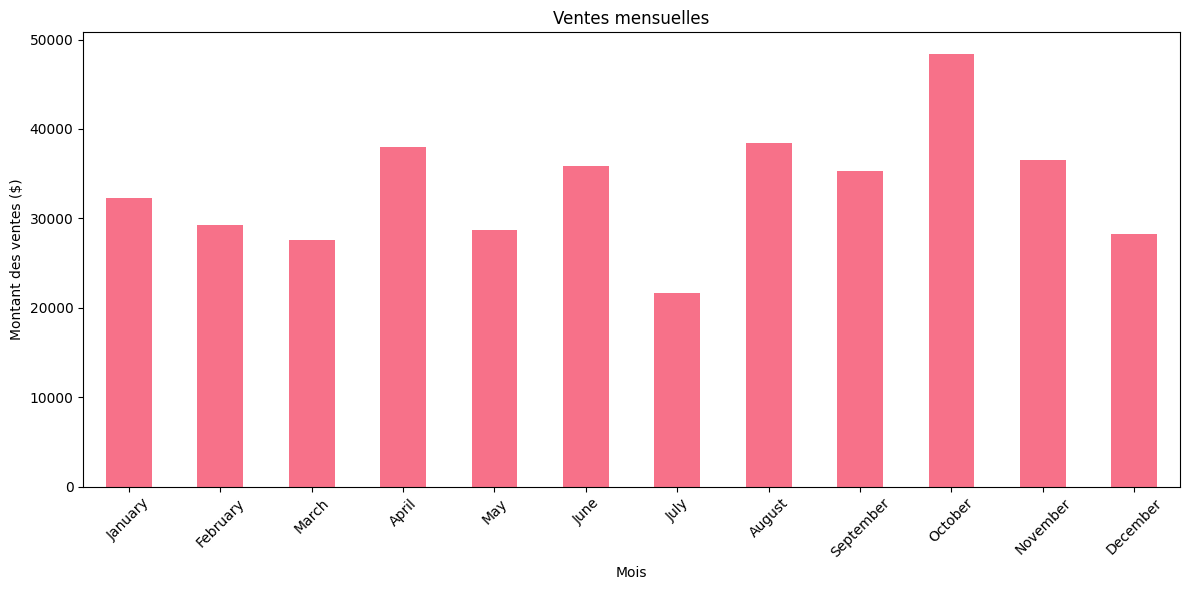

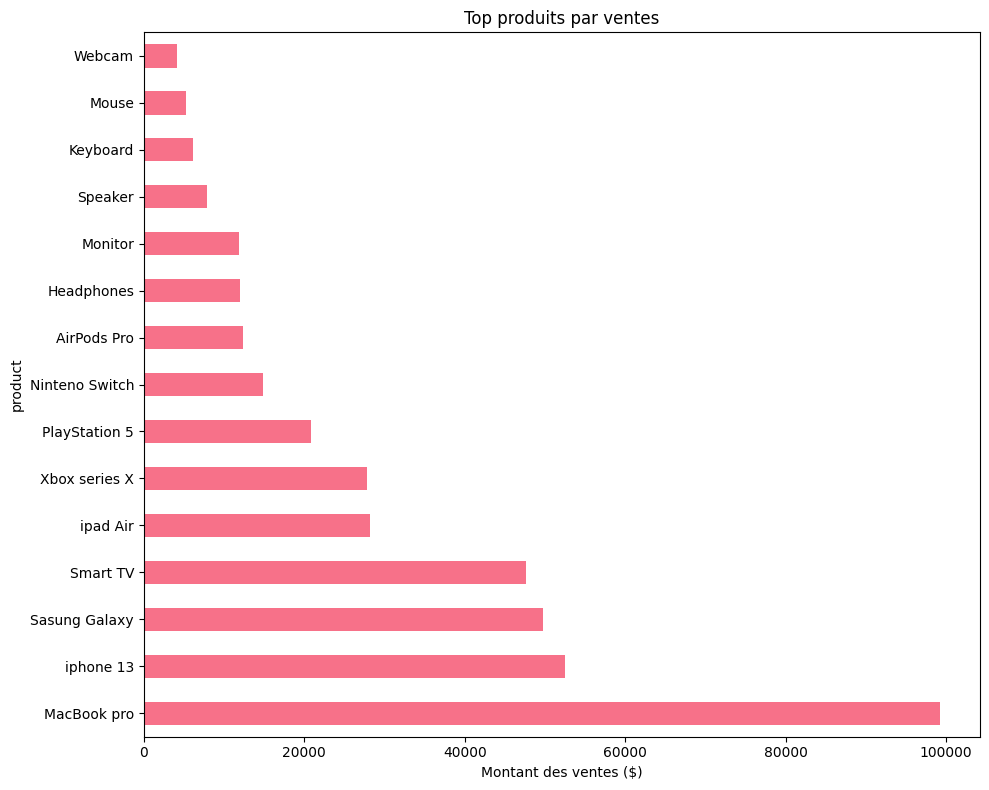

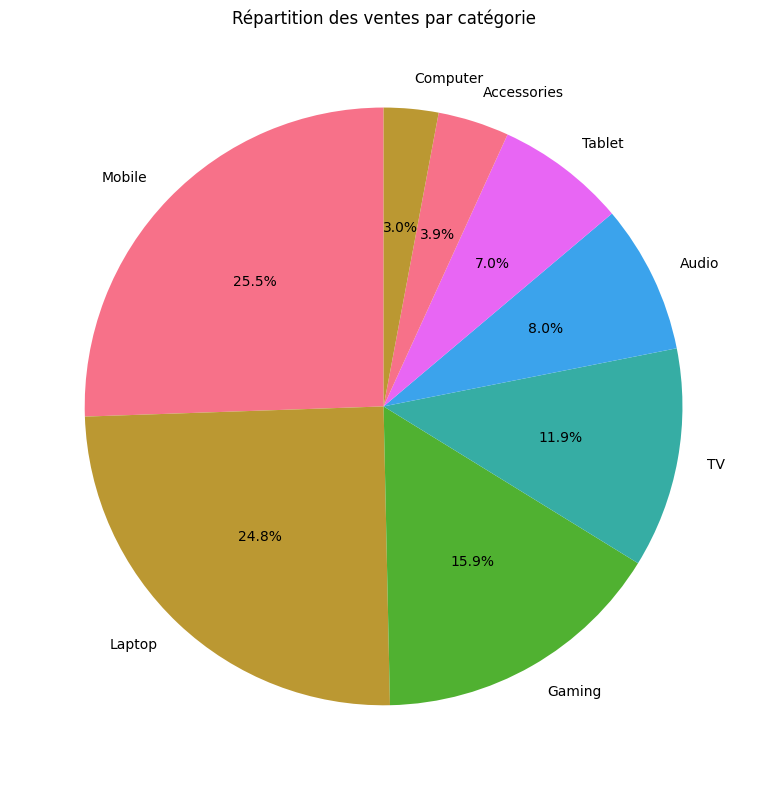

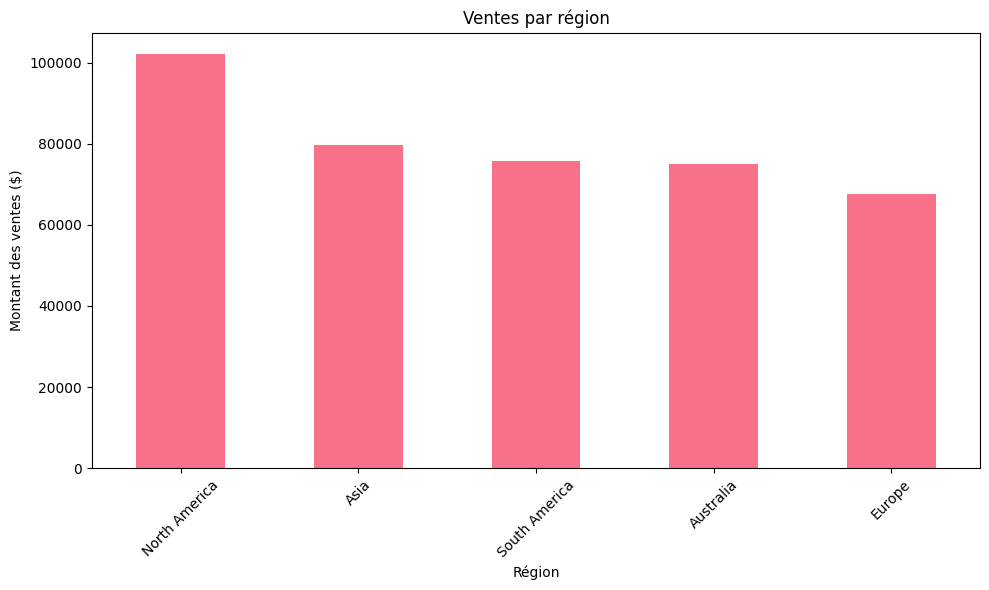

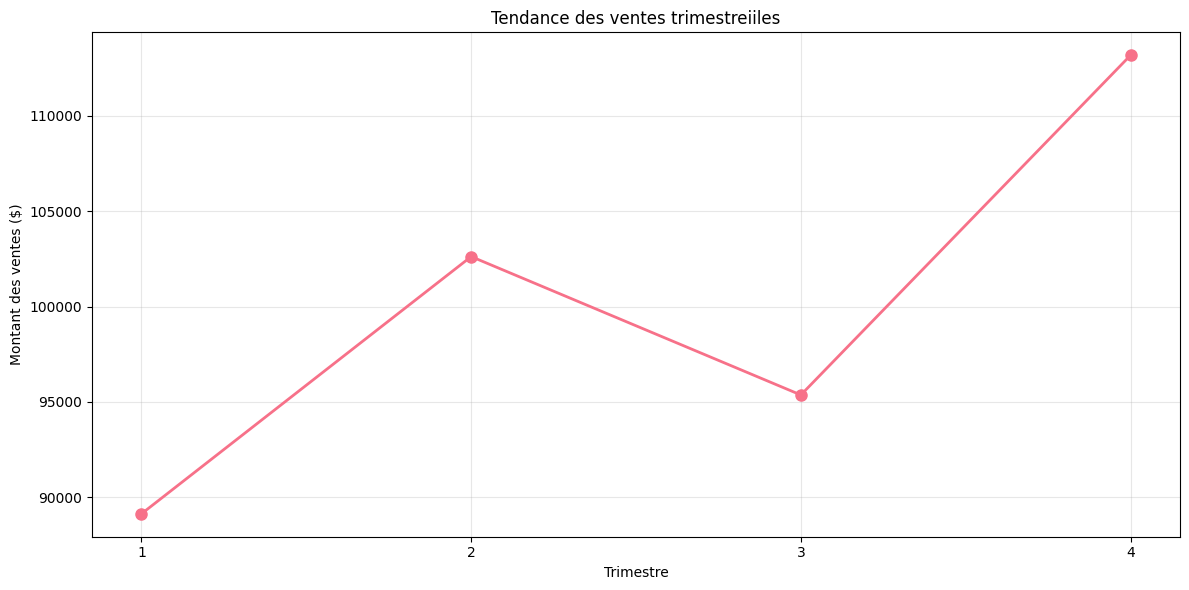

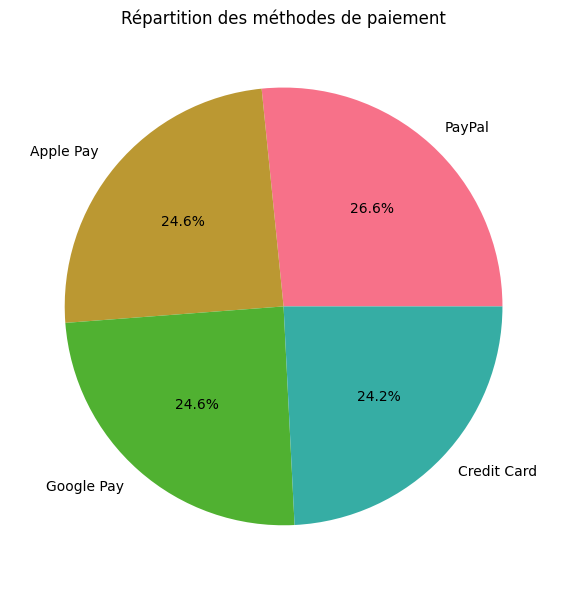

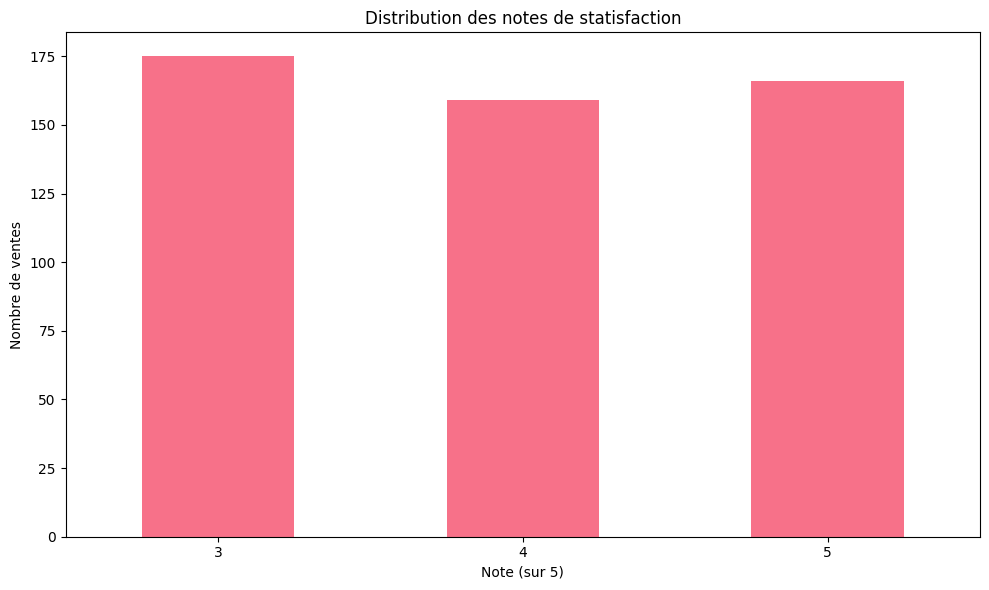

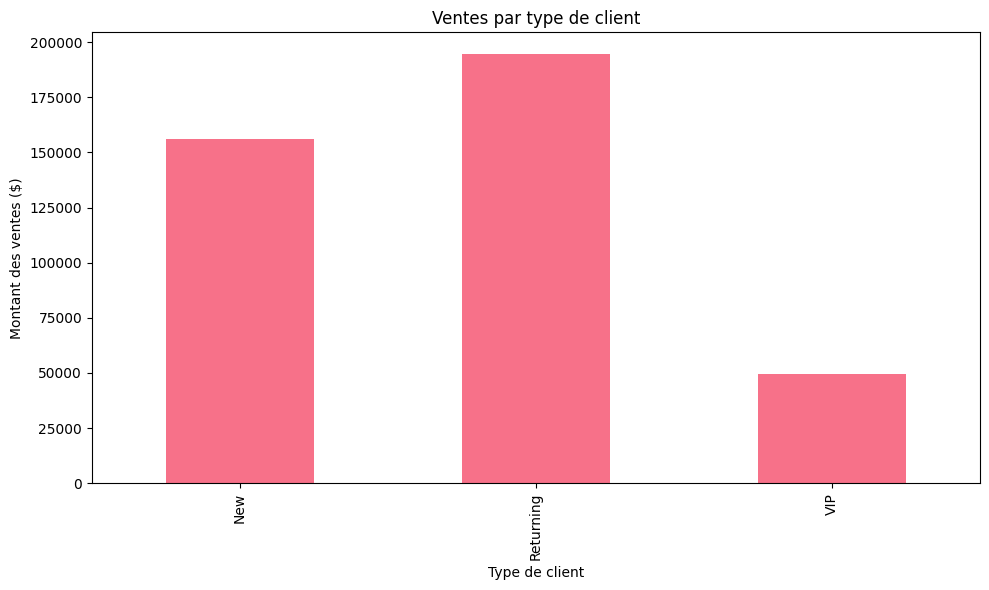

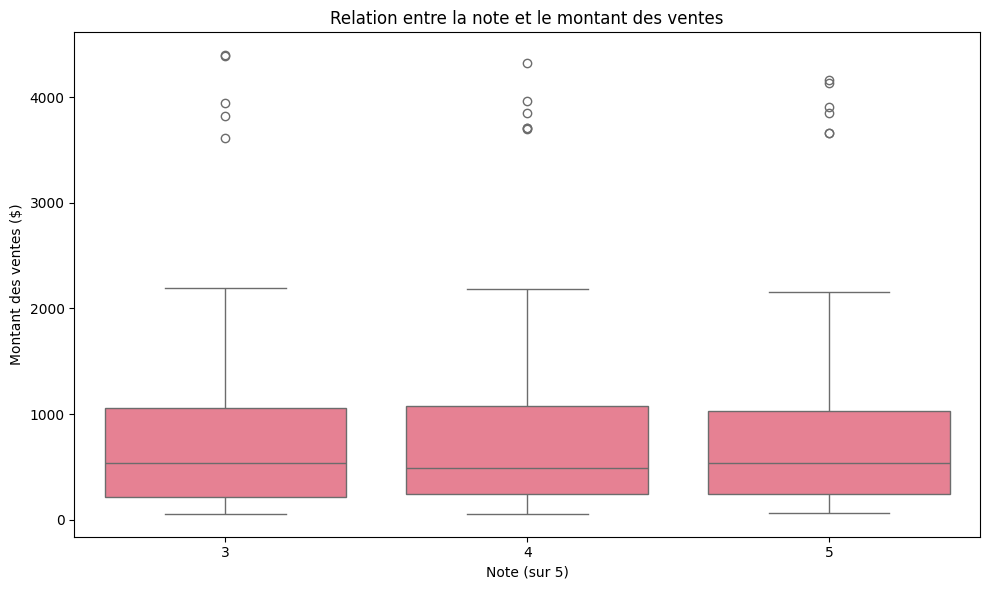

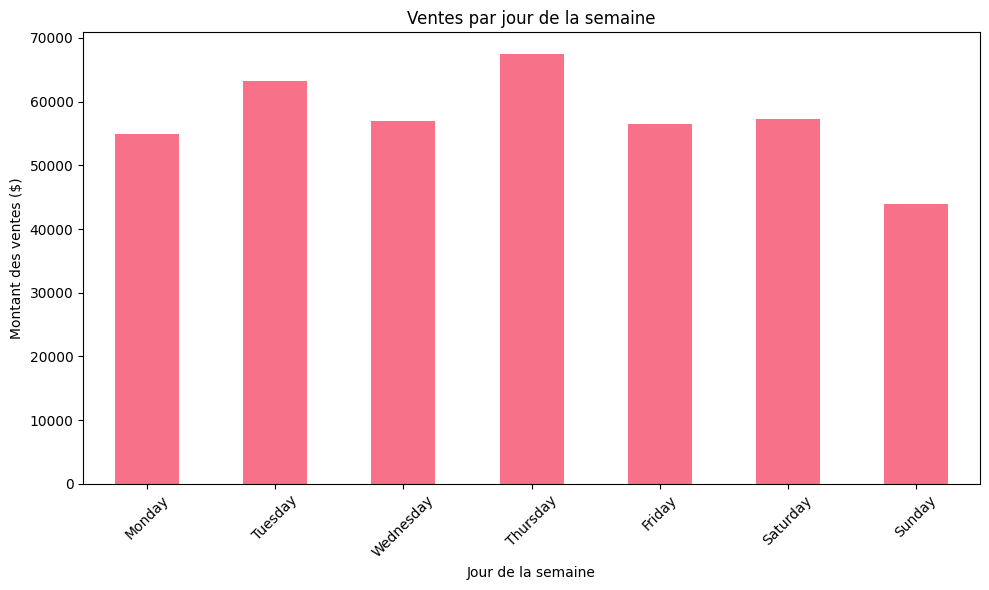


Informations supplémentaires : 
Total des ventes : $400,296.71
Valeur moyenne des commande : $800.59
Produit le plus vendu (quantité) : Mouse
Produit avec le plus de revenus : MacBook pro
Région la plus performante : North America
méthode de paiement la plus populaire : PayPal
Note moyenne de satisfaction : 3.98/5
Quantité totale vendue : 812 unités
Pourcentage de clients VIP : 11.0

Aperçu des données : 
   order_id       date         product     category  quantity  unit_price  \
0      1000 2023-07-11        Smart TV           TV         1      793.21   
1      1001 2023-09-22   PlayStation 5       Gaming         1      503.31   
2      1002 2023-07-24      Headphones        Audio         1      216.89   
3      1003 2023-07-10  Ninteno Switch       Gaming         2      290.57   
4      1004 2023-08-15     AirPods Pro        Audio         1      270.90   
5      1005 2023-08-17        Keyboard  Accessories         3       92.07   
6      1006 2023-05-26       iphone 13       Mobile

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta

def create_online_sales_data():
    products = ['iphone 13', 'Sasung Galaxy', 'MacBook pro', 'ipad Air', 'AirPods Pro', 'PlayStation 5', 'Xbox series X', 'Ninteno Switch', 'Smart TV', 'Monitor', 'Keyboard', 'Mouse', 'Webcam', 'Headphones', 'Speaker']
    categories = ['Mobile', 'Mobile', 'Laptop', 'Tablet', 'Audio', 'Gaming', 'Gaming', 'Gaming', 'TV', 'Computer', 'Accessories', 'Accessories', 'Accessories', 'Audio', 'Audio']
    prices = [999, 899, 1999, 599, 249, 499, 499, 299, 799, 299, 89, 59, 99, 199, 149]

    product_info = {products[i]: {'category': categories[i], 'price': prices[i]} for i in range(len(products))}

    data = []

    for i in range(500):
        product = np.random.choice(products)
        category = product_info[product]['category']
        base_price = product_info[product]['price']

        price = base_price * (1 + np.random.uniform(-0.1, 0.1))

        if base_price < 100:
            quantity = np.random.randint(1, 4)
        else:
            quantity = np.random.randint(1, 3)

        month = np.random.randint(1, 13)
        day = np.random.randint(1, 29)
        date = f"2023-{month:02d}-{day:02d}"

        region = np.random.choice(['North America', 'Europe', 'Asia', 'Australia', 'South America'])
        payment_method = np.random.choice(['Credit Card', 'PayPal', 'Apple Pay', 'Google Pay'])
        customer_type = np.random.choice(['New', 'Returning', 'VIP'], p=[0.4, 0.5, 0.1])
        rating = np.random.randint(3, 6)
        sales = quantity * price
        data.append({
            'order_id': 1000 + i,
            'date': date,
            'product': product,
            'category': category,
            'quantity': quantity,
            'unit_price': round(price, 2),
            'region': region,
            'payment_method': payment_method,
            'customer_type': customer_type,
            'rating': rating,
            'total_sales': round(sales, 2)
            
        })

    df = pd.DataFrame(data)

    df.to_csv('online_sales_data.csv', index=False)
    print("Fichier online_sales_data.csv créé avec succès!")

    return df

df = create_online_sales_data()

df['date'] = pd.to_datetime(df['date'])

df['month'] = df['date'].dt.month_name()
df['quarter'] = df['date'].dt.quarter
df['day_of_week'] = df['date'].dt.day_name()

print("Information du dataset : ")
print('=' * 50)
print(df.info())
print("\n" + "=" * 50)
print("\nRésumé statistique:")
print('=' * 50)
print(df.describe())
print("\n" + "=" * 50)
print(df.info())
print("\n" + "=" * 50)
print("\nRésumé staistique : ")
print("=" * 50)
print(df.describe())
print("\n" + "=" * 50)

print("\nValeurs manquantes : ")
print("=" * 50)
print(df.isnull().sum())
print("\n" + "=" * 50)

plt.style.use('default')
sns.set_palette('husl')

plt.figure(figsize=(12, 6))
monthly_sales = df.groupby('month')['total_sales'].sum()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] 
monthly_sales = monthly_sales.reindex(month_order)
monthly_sales.plot(kind='bar')
plt.title('Ventes mensuelles')
plt.xlabel('Mois')
plt.ylabel('Montant des ventes ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
top_products = df.groupby('product')['total_sales'].sum().sort_values(ascending=False)
top_products.plot(kind='barh')
plt.title('Top produits par ventes')
plt.xlabel('Montant des ventes ($)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
category_sales = df.groupby('category')['total_sales'].sum().sort_values(ascending=False)
plt.pie(category_sales.values, labels=category_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Répartition des ventes par catégorie')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
region_sales = df.groupby('region')['total_sales'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar')
plt.title('Ventes par région')
plt.xlabel('Région')
plt.ylabel('Montant des ventes ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
quarterly_sales = df.groupby('quarter')['total_sales'].sum()
quarterly_sales.plot(kind='line', marker='o', linewidth=2, markersize=8)
plt.title('Tendance des ventes trimestreiiles')
plt.xlabel('Trimestre')
plt.ylabel('Montant des ventes ($)')
plt.xticks(range(1, 5))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
payment_counts = df['payment_method'].value_counts()
payment_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Répartition des méthodes de paiement")
plt.ylabel('')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
rating_counts = df['rating'].value_counts().sort_index()
rating_counts.plot(kind='bar')
plt.title('Distribution des notes de statisfaction')
plt.xlabel('Note (sur 5)')
plt.ylabel('Nombre de ventes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
customer_sales = df.groupby('customer_type')['total_sales'].sum()
customer_sales.plot(kind='bar')
plt.title('Ventes par type de client')
plt.xlabel('Type de client')
plt.ylabel('Montant des ventes ($)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='total_sales', data=df)
plt.title("Relation entre la note et le montant des ventes")
plt.xlabel('Note (sur 5)')
plt.ylabel('Montant des ventes ($)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
day_sales = df.groupby('day_of_week')['total_sales'].sum()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_sales = day_sales.reindex(day_order)
day_sales.plot(kind='bar')
plt.title('Ventes par jour de la semaine')
plt.xlabel('Jour de la semaine')
plt.ylabel('Montant des ventes ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nInformations supplémentaires : ")
print("=" * 50)
print(f"Total des ventes : ${df['total_sales'].sum():,.2f}")
print(f"Valeur moyenne des commande : ${df['total_sales'].mean():,.2f}")
print(f"Produit le plus vendu (quantité) : {df.groupby('product')['quantity'].sum().idxmax()}")
print(f"Produit avec le plus de revenus : {df.groupby('product')['total_sales'].sum().idxmax()}")
print(f"Région la plus performante : {df.groupby('region')['total_sales'].sum().idxmax()}")
print(f"méthode de paiement la plus populaire : {df['payment_method'].value_counts().idxmax()}")
print(f"Note moyenne de satisfaction : {df['rating'].mean():.2f}/5")
print(f"Quantité totale vendue : {df['quantity'].sum()} unités")
print(f"Pourcentage de clients VIP : {(df['customer_type'] == 'VIP').mean() * 100:.1f}")

print("\nAperçu des données : ")
print('=' * 50)
print(df.head(10))

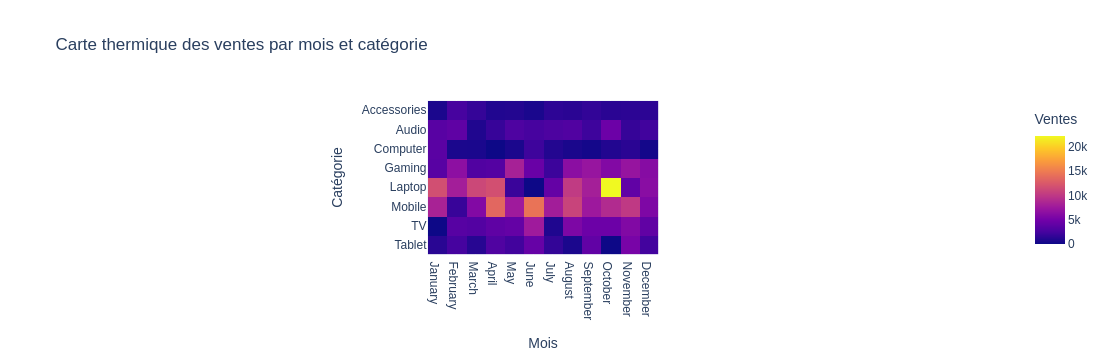

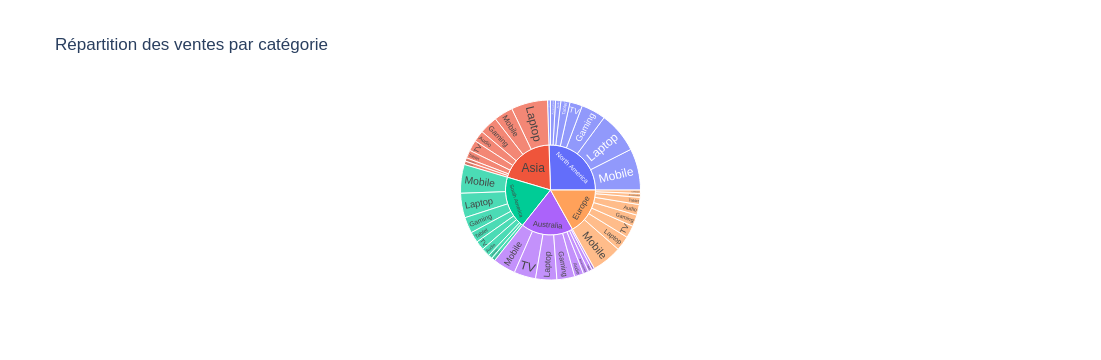

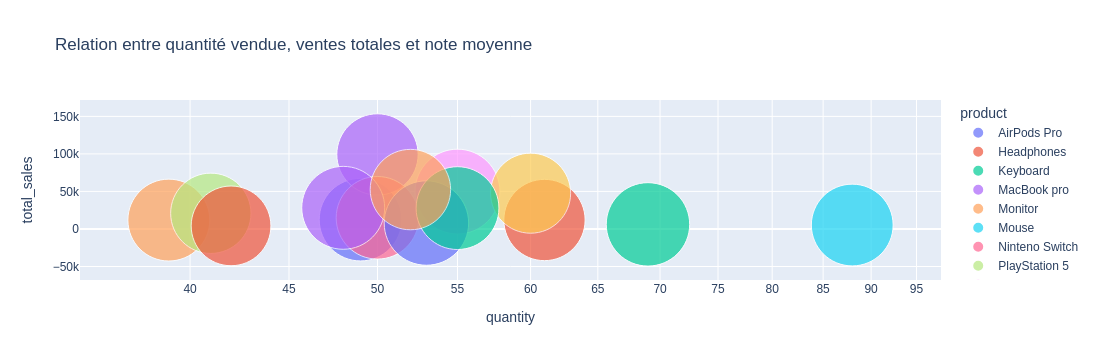


Analyses des corrélations : 
Mtrice de corrélation : 
             quantity  unit_price  total_sales    rating
quantity     1.000000   -0.133229     0.157796  0.060487
unit_price  -0.133229    1.000000     0.900779 -0.028932
total_sales  0.157796    0.900779     1.000000 -0.002423
rating       0.060487   -0.028932    -0.002423  1.000000


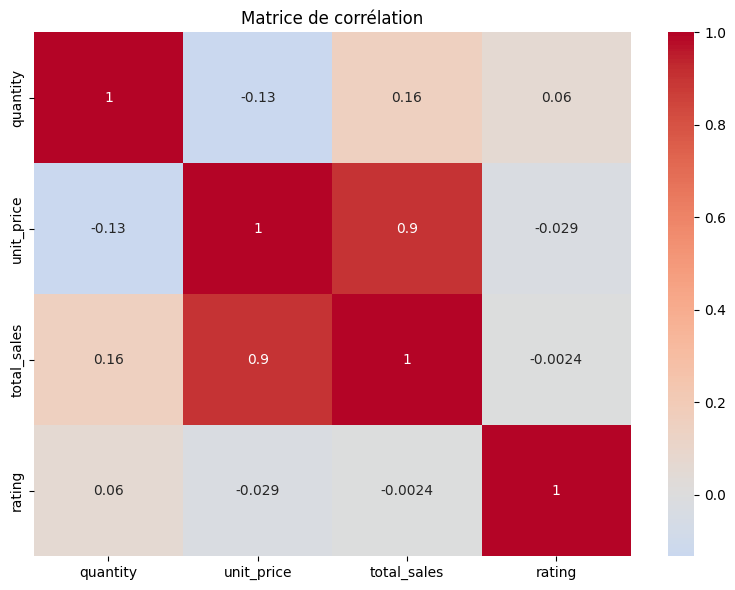


Analyse des clients VIP (55 commandes) : 
Ventes total VIP : $49,523.79
Valeur moyenne des commandes VIP : $900.43
Note moyenne des VIP : 4.11/5

Porcentage d'utilisation des méthodes de paiement par région : 
payment_method  Apple Pay  Credit Card  Google Pay  PayPal
region                                                    
Asia                 19.6         23.7        26.8    29.9
Australia            25.5         23.5        23.5    27.5
Europe               21.9         24.0        28.1    26.0
North America        23.6         22.7        29.1    24.5
South America        32.6         27.4        14.7    25.3


In [45]:
try:
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots

    heatmap_data = df.groupby(['month', 'category'])['total_sales'].sum().unstack().fillna(0)
    heatmap_data = heatmap_data.reindex(month_order)
    fig = px.imshow(
        heatmap_data.T, 
        labels=dict(x='Mois', y='Catégorie', color='Ventes'),
        x=heatmap_data.index,
        y=heatmap_data.columns,
        title="Carte thermique des ventes par mois et catégorie"
    )
    
    fig.show()

    region_category_sales = df.groupby(['region', 'category'])['total_sales'].sum().reset_index()
    fig = px.sunburst(region_category_sales, path=['region', 'category'], values='total_sales',title="Répartition des ventes par catégorie")
    fig.show()

    product_stats = df.groupby('product').agg({
        'total_sales': 'sum',
        'quantity': 'sum',
        'rating': 'mean'
    }).reset_index()

    fig = px.scatter(product_stats, x="quantity", y="total_sales", size="rating", color="product", hover_name="product", log_x=True, size_max=60, title="Relation entre quantité vendue, ventes totales et note moyenne")
    fig.show()

except ImportError:
    print(error)
    #print('Plotly n'est pas installé, put des visualisations interactives, installez-le avec : pip install plotly')

print("\nAnalyses des corrélations : ")
print('=' * 50)

numeric_cols = ['quantity', 'unit_price', 'total_sales', 'rating']
correlation_matrix = df[numeric_cols].corr()
print('Mtrice de corrélation : ')
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation')
plt.tight_layout()
plt.show()

vip_customers = df[df['customer_type'] == 'VIP']
print(f"\nAnalyse des clients VIP ({len(vip_customers)} commandes) : ")
print(f"Ventes total VIP : ${vip_customers['total_sales'].sum():,.2f}")
print(f"Valeur moyenne des commandes VIP : ${vip_customers['total_sales'].mean():,.2f}")
print(f"Note moyenne des VIP : {vip_customers['rating'].mean():.2f}/5")

payment_region = pd.crosstab(df['region'], df['payment_method'], normalize='index') * 100
print("\nPorcentage d'utilisation des méthodes de paiement par région : ")
print(payment_region.round(1))

In [48]:
summary_data = {
    'Metric': ['Total Sales', 'Average Order Value', 'Total Quantity Sold', 'Average Rating', 'Top Product by Revenue', 'Top Région', 'VIP Customer Percentage'],
    'values': [
        f"${df['total_sales'].sum():,.2f}",
        f"${df['total_sales'].mean():,.2f}",
        f"{df['quantity'].sum()} units",
        f"{df['rating'].mean():.2f}/5",
        df.groupby('product')['total_sales'].sum().idxmax(),
        df.groupby('region')['total_sales'].sum().idxmax(),
        f"{(df['customer_type'] == 'VIP').mean() * 100:.1f}%"
    ]
}

summary_df = pd.DataFrame(summary_data)
print("\nRésumé des performances : ")
print("=" * 50)
print(summary_df)

summary_df.to_csv('sales_summary.csv', index=False)
print("\nRésumé sauvgardé dans sales_summary.csv")

product_summary = df.groupby('product').agg({
    'total_sales' : 'sum',
    'quantity': 'sum',
    'unit_price': 'mean',
    'rating' : 'mean'
}).round(2).sort_values('total_sales', ascending=False)

product_summary.to_csv('produit_performance.csv')
print('Performance par produit sauvgardées dans product_performance.csv')


Résumé des performances : 
                    Metric         values
0              Total Sales    $400,296.71
1      Average Order Value        $800.59
2      Total Quantity Sold      812 units
3           Average Rating         3.98/5
4   Top Product by Revenue    MacBook pro
5               Top Région  North America
6  VIP Customer Percentage          11.0%

Résumé sauvgardé dans sales_summary.csv
Performance par produit sauvgardées dans product_performance.csv
